Updated 23 June 2024 by Anna Preus. 

Original:
Devin Short 
30 June 2023 
shortda@uw.edu

This is a tutorial demonstrating how to explore data parsed out of the catalogues. The idea is to understand what kind of content we've generated, get a feel for how well our current tools are working, and try improving them. This notebook requires functions from `reporting.py`, currently living in the scripts directory of the github repository.

Let's import some packages and set parameters we'll use below.

In [1]:
import pandas as pd
import re

pd.set_option('display.max_colwidth', 500)

# If you're running this notebook from a directory that doesn't contain
# reporting.py you'll either need to edit the following line to reflect
# the relative location of the reporting module or copy reporting.py
# into the current directory
from reporting import histogram_strings_by_length

# The year determines which issue of the catalogue we're looking at
# across the entire notebook
year = 12

Next, we can read in the file we're focusing on and save it as a Pandas dataframe.

In [2]:
path = f'../entries/clean_entries/entries_19{year}.csv'

entries_1912 = pd.read_csv(path, header=None)

To view the data, run the line below, which will display a random sample of the dataset of the length specified in parens.

In [3]:
entries_1912.sample(30)

,0
7908,"Hellis (Nellie)—Where the brook and river meet, Reissue. Cr. 8vo., pp. 302, is, net GARDNER, D., Apr. 12"
10105,"Leslie (Maj. John H.) and Smith (Capt. D.) eds.- A Bibliography of works by officers, non-com- missioned officers and men who have ever served in the Royal Bengal, Madras, or Bombay Artillery. Part 4, Colomb-Du Boulay. 8vo. 94 x6, pp. 25-40, 25. .LENG, June 12"
2052,NaN
8495,"Humpty Dumpty, Shaw (F.) 14d. net ..Dec. 11 Hundred years of history, Johnstone (H.) 5s. net Jan. 12"
145,"Adventures of Spider & Co., Hamer (S. H.) is. 6d. net .Oct. 12"
13880,"Poor (C. M.)--Iwan der Schreckliche, Hoffmann (E. T. W.) 3s. net Jan, 12"
2732,"Camilla forgetting herself, Vahey (H. L.) 6. Jan. 12"
11804,"Modern Ahab, Wilson (T. W.) 6. ..... Sep. 12"
2235,"Britain Romanization of Roman, Haverfield (F.) 35. 64. net.. ... July 12"
17600,"Uncounted cost, Gaunt (M.) is. net......May 12"


## <u>Summarizing data with histograms</u>

One way to start getting a rough sense of how well our splitting is working is by looking at the number of characters in all entries parsed out of one year of the catalogue. Most good entries are going to have similar lengths because they display similar data. Extremely short entries are probably fragments created by OCR errors and some extremely long entries will be multiple entries the code we're using failed to split apart.

We can get an overview by creating a histogram of the entry lengths. A histogram shows a series of bins on the bottom axis and the number of objects falling into each bin on the vertical axis. In this case I've created bins 5 characters wide, so each bar in the plot below shows the number of entries 0-5 characters long, 5-10 characters long, etc.

I've also created parameters to examine "underflow" and "overflow" regions of the histogram. Underflow and overflow counts in a histogram refer to objects that are irrelevant for some reason. In many cases a histogram will have a single underflow or overflow bin that aggregates everything outside the region of interest, but I've included the full histogram here and shaded the outflow regions.

total number of strings: 18879
number of strings shorter than 30 characters: 134, 0.7%
number of strings within outflow limits: 18697
number of strings longer than 300 characters: 48, 0.3%


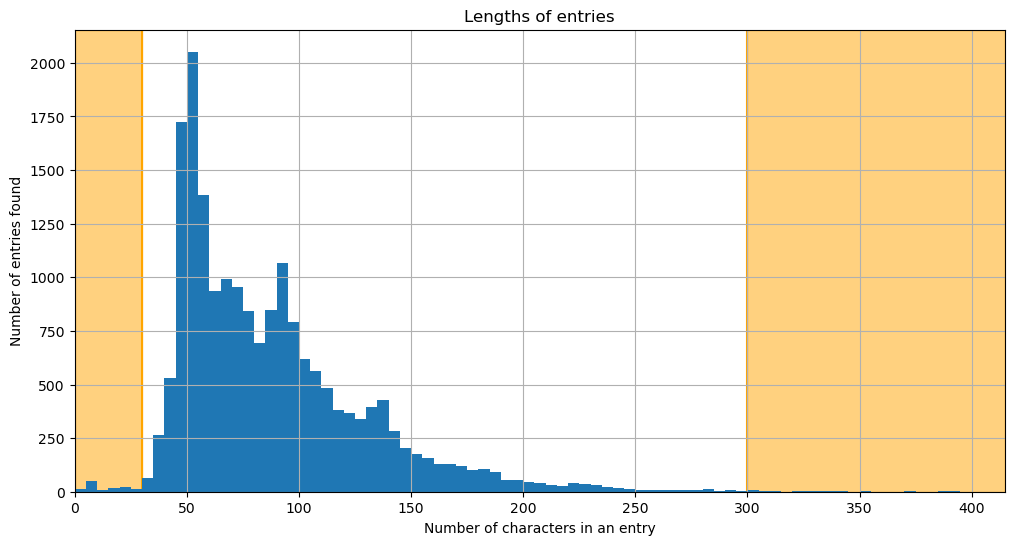

In [4]:
path = f'../entries/clean_entries/entries_19{year}.csv'

# Run this cell and then play around here by adding bins=20 to the
# list of arguments in the call to histogram_strings_by_length below.
# Then try bins=range(400).
# You can change the outflow boundaries by adding underflow_lim or
# overflow_lim to the list of arguments and setting them to integers.
# The default values are underflow_lim=30, overflow_lim=300.
hist_results = histogram_strings_by_length(
    path,
    show_over_under=True,
    drop_nulls=True
)

Looking at the shape of the histogram, you'll see there's a large peak around 50 characters, but then there are smaller peaks at about 90 characters and 140 characters. How might we find out what causes that structure?

Let's start by viewing some of the entries.

In [5]:
# Get the clean entries from a csv file. Squeeze the result to convert
# the single-column dataframe into a series.
path = f'../entries/clean_entries/entries_19{year}.csv'
clean_entries = pd.read_csv(path, header=None).squeeze()

# Drop null values
clean_entries = clean_entries.dropna()

# Get the length of each entry string
lengths = clean_entries.map(len)

# Get entry strings around the center of the largest peak
first_peak = clean_entries.loc[(lengths > 47) & (lengths < 53)]

# Get entries in the second peak
second_peak = clean_entries.loc[(lengths > 89) & (lengths < 96)]

# Get entries in the third peak
third_peak = clean_entries.loc[(lengths > 134) & (lengths < 140)]

# View a random sample of values in each peak
print(first_peak.sample(20), '\n\n')
print(second_peak.sample(20), '\n\n')
print(third_peak.sample(20))



940         Autobiography, Tyrrell (G.) 215. net......Oct. 12
629         Arm and prepare, Le Breton (J.) 6d. net.. Nov. 12
10375       Living pictures, Newte (H. W. C.) is. net July 12
17204    To love and to cherish, Rowlands (E. A.) 6S. Aug. 12
8081        His Lordship's baby, Protheroe (H.) 6S... Ma“, 12
6112       Flowers, Wild : painting book, is. ... ... Aug. 12
12779        On the fringe, Speight (T. W.) 69....... Nov. 12
14079        Princess of Vascovy, Oxenham (J.) 6d. .. Apr. 12
8104         History of Aythan Waring, Jacob (V.) 6d. Oct. 12
899         Aurelius, Marcus, Presland (J.) 59. net.. Sep. 12
4549         Devil in London, Sims (G. R.) is, net. · June 12
9688      Lady of Blossholme, Haggard (Sir H. R.) 6d. Apr. 12
10694       Luxembourg, Night in the, Gourmont (R. de) May 12
1838         Bleak House, Dickens (C.) 25. net ...... July 12
18802       Woven of the wind, Swan (A. S.) 35. 6d... Oct. 12
12704     Oil-finding, Craig (E. H. C.) 8s. 60. net.. June 12
7727    

Run the previous cell several times, examining the output carefully each time. Are there clear differences in the contents of the entries from each peak? Can they be explained by reasonable features of a real data set or do you think the structure in the histogram is a result of bad parsing?

I think we can draw three conclusions here (Devin's analysis):

1. The largest peak is the easiest to explain: title-first entries, which only contain the book title, author name, price, and month of publication, are frequently about 50 characters long. There are of course a huge number of title-first entries much longer than that, and the other two peaks are sitting on top of a long tail from the title-first peak.
2. The second peak looks like it consists mostly of author-first entries for single-author, single-title books.
3. The third peak is the most complicated. I see books that have both multiple authors and long subtitles, as well as entries that have additional information like a series name, such as `(Langham bibelots, No. 10.)`, or a note about translation, for instance `English version by A. W. Verrall.`

## <u>Testing new methods</u>

Now that we have looked at how our code is currently parsing this issue of the catalogue, we can try adding to our regular expressions patterns to see if we can split the entries more accurately. 

If you want to search for a specific word or textual pattern, you can use the code cell below and just replace "see" in the second to last line with the word or pattern you're looking for.

In [6]:
author_to_author_entries = clean_entries.loc[
    clean_entries.str.contains(' see ')
]

# python interprets two strings on successive lines as a single string
# so it's easier to read long strings in source code.
print(
    'number of entries containing " see ":'
    f' {author_to_author_entries.size}\n\n'
)

author_to_author_entries = clean_entries.loc[
    clean_entries.str.contains(' see ') & (lengths < 120)
]
author_to_author_entries.sample(20)

number of entries containing " see ": 364




14318                                                                                        Rainy (Harry) see Hutchison (R.).
16192                                                                Spence (Lewis) see Edwardes (M.) and Spence. pp. 288, 6s.
12696    Ogilvie-Grant (W. R.) see under British Museum (Nat. Hist.). Ogilvies' adventures, Haverfield (E. L.) 35. 6d. Oct. 12
14583                             Revis (Cecil) see Bolton (E. R.) and Revis. Revolt, The, Weale (B. L. P.) 6s.........Mai. 12
17935               Wainwright (E. G.) see Lester (H. A.) and Wain- wright. Wait and win, Challacombe (J.) Is. 6d..... Oct. 12
12612                              Nunn (T. Percy) see Barrett (E.) and Nunn. Nunnery, Truthi about a, Ayesha (M.) 6s, Mar. 12
7381               Grove (H. M.) see Haenen (F. de) and Grove. Grove family of Halesowen, Davenport (J.) 78. 6d. net ..Mar. 12
6894                          Giveen (R. L.) see Smith (L. C.) and Giveen. Giver in secret, Cobb (T.) 25. net..

Now, we can look at a sample of the longest entries to see where they are not being split correctly. 

In [7]:
clean_entries.loc[(lengths > 325) & (lengths < 350)]

126        Admiralty-Hydrographic. Admiralty list of lights, &c. Pt. 1, British Islands, 1912, is. 6d. ; pt. 2 (B), Norway, 1912, 25. ; pt. 3, Baltic Sea, 1912, 25. ; pt. 5, Mediterranean, Black, and Red Seas, 1912, Is. 6d. ; pt. 6, Indian and West Pacific Oceans, 1912, 25.; pt. 8, Western side of North Atlantic Ocean, 1912, 25. 6d. POTTER, Mar. 12
1648             Biermann (Georg.)-Florence and her art. Trans. by Francis F. Cox. 16mo. 61 X41, pp. 84, Is. net . SIEGLE, H., Aug. 11 Big Fish, Watson (H. B. M.) 6s. ........ July 1. Bigandet (P.)— The Life or legend of Gaudama, the Buddha of the Burmese. 4th edit. 2 vols. 8vo. 81 X55, pp. 288, 334, 218. (Trubner's Oriental ser.) .K. PAUL, Jan. 12
2704                    Cambridge University–Higher local examination papers, June, 1912: with lists of syndics and Examiners. To which are added the regulations for the examinations in Dec., 1912, and June, 1913, and for the certificates of proficiency in modern languages and religious knowledge,

A substantial number of long entries have a date that should mark a point to split entries that was missed for some reason. Reviewing a few samples in the previous cell, I see at least three cases that need to be handled:
1. OCR mistakes, like `I2` or `1z` or `iz` rather than `12`
2. Books published in 1911 and listed in this catalogue (our code assumes `12` is part of the entry delimiter)
3. Entries with apparently well-formed 1912 dates that the current code failed on. For example, entry `14814` appears to be three entries separated by two 1912 dates that were skipped over for reasons I don't understand yet. Run the next cell to see it.

In [8]:
clean_entries[14814]

'Rock (W. S.)-Zenobia ; or, The Mystery of life. Roh wer (S. A.)-Sawflies from Panama, with Cr. 8vo., 65. ...DRANE, Aug. 12 descriptions of new genera and species. 8vo. ck garden, Farrer (R.) is. 6d. net......Oct. 12 91 x64, pp. 6, swd. IS. net (Smithsonian is of the ravens, Steuart (J. A.) 6s. ....Oct. 12 collections) . WESLEY, Oct. 12'

The first two cases are relatively easy to handle. Let's start by finding the regular expressions our code uses to split entries apart and build on that to improve the current process. That code is documented in `Parsing_ECB_1912_wi23.ipynb`, currently living in the `scripts` directory of the github repository. In the section "Splitting the Text into Entries" in that notebook, I find the following process:

In [9]:
# ALL CODE IN THIS CELL IS ADAPTED FROM Parsing_ECB_1912_wi23.ipynb

# read the Hathi Trust OCR into memory
with open(f'../princeton_years/ecb_19{year}.txt', encoding='utf8') as f:
    ocr_full_text = f.read()

# Separate main text from the front matter of the catalogue (note the
# string called ocr_main_text still has the back matter attached until
# a later step)
# Note python allows multiple assignment: the split operation below
# creates a two-element list whose elements are then assigned to two
# different variables
ocr_front_matter, ocr_main_text = re.split(r'A\nACADEMY', ocr_full_text)

appendix_pattern = (
    r"APPENDIX\nLEARNED SOCIETIES, PRINTING CLUBS, &c., "
    r"WITH LISTS OF THEIR\nPUBLICATIONS, 1912"
)

# Separate main text from the back matter of the catalogue
ocr_main_text, ocr_back_matter = re.split(appendix_pattern, ocr_main_text)

# Make a regular expression to capture headers at the top of each
# catalogue page
header_capital_letters = r"^(?:[A-Z\-\'\sÈ]+)"
header_pattern = r"^#(?s:.*?){}(?s:.*?){}(?s:.*?){}$".format(
    header_capital_letters, header_capital_letters, header_capital_letters
)

# Split the main text into pages and strip the headers. According to
# Parsing_ECB_1912_wi23.ipynb this method fails to remove six headers.
pages = [
    re.sub(header_pattern, '', page, flags=re.M)
    for page in ocr_main_text.split('\f')
]

# Now find all lines ending in 12 and insert a token to split on
entries_by_page = [
    re.sub(r'(\W12\.?$)', '\\1<ENTRY_CUT>', page, flags=re.M)
    for page in pages
]

# Split on the token to create a list of lists where each element is
# a list of entries on an individual page
entries_by_page = [
    re.split(r'<ENTRY_CUT>', page, flags=re.M)
    for page in entries_by_page
]

print(f'total entries: {sum([len(p) for p in entries_by_page])}')

total entries: 19920


Now let's test a new regular expression for splitting entries 

In [10]:
# This cell assumes we're looking at the 1912 catalogue; try changing
# this code (and the year parameter in the first code cell of the
# notebook) to catch OCR mistakes for a different year.

# create a list of possible values the OCR software might have created
# when it ran into an 11 or 12 on the page
ocr_interpretations_of_12 = [
    '12',
    'i2',
    'I2',
    '1z',
    '1Z',
    'iz',
    'Iz',
    'iZ',
    'IZ'
]
ocr_interpretations_of_11 = [
    '11',
    'i1',
    'I1',
    '1i',
    '1I',
    'ii',
    'Ii',
    'iI',
    'II'
]
terminators = ocr_interpretations_of_11 + ocr_interpretations_of_12

# modify the existing regex with our new options
entry_terminator_regex = r'(\W({})\.?$)'.format('|'.join(terminators))

# get a new set of entries the same way as above, but using the new
# regular expression
new_entries_by_page = [
    re.sub(entry_terminator_regex, '\\1<ENTRY_CUT>', page, flags=re.M)
    for page in pages
]
new_entries_by_page = [
    re.split(r'<ENTRY_CUT>', page, flags=re.M)
    for page in new_entries_by_page
]

print(f'total entries: {sum([len(p) for p in new_entries_by_page])}')


total entries: 20077


OK, we might have found 157 entries that weren't caught with the previous splitting expression, meaning we might have gained 314 entries that were either not present or invalid in the previous data set. Let's see if that's really what happened.

number of new entries: 301


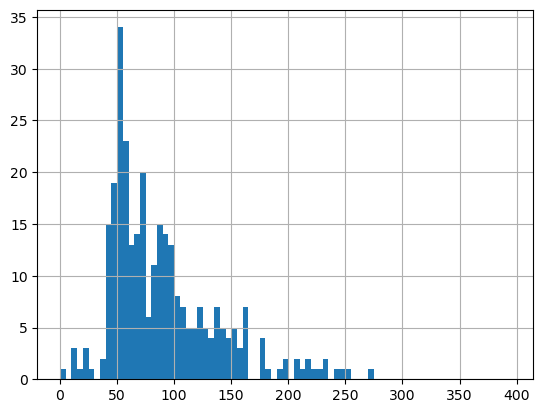

In [11]:
# It can be much more efficient to do things like check if elements in
# one sequence exist in another using pandas objects rather than the
# standard python library, so I flatten the lists of lists of entries
# into pandas series containing all the entries.
old_entries = pd.Series(
    [e for page in entries_by_page for e in page],
    dtype=pd.StringDtype()
)
new_entries = pd.Series(
    [e for page in new_entries_by_page for e in page],
    dtype=pd.StringDtype()
)

# strip nonprinting characters and replace all newlines in each entry
# with spaces
old_entries = old_entries.str.strip()
new_entries = new_entries.str.strip()
old_entries = old_entries.str.replace('\n', ' ')
new_entries = new_entries.str.replace('\n', ' ')

# Get new entries that don't exist in the old set
new_entries = new_entries.loc[~new_entries.isin(old_entries)]

print(f'number of new entries: {len(new_entries)}')

# plot a histogram of lengths of the new entries
fig2 = new_entries.map(len).hist(bins=range(0, 400, 5))

The histogram we started with covers nearly 20,000 entries. Here we have only 300, but the plot generated in the previous cell already looks extremely similar to the one at the top of the document. This means we can probably assume the entries we've produced here are just as good as the rest of the entries we're already capturing. Probably! I haven't actually looked at the new entries in detail, but it's 0200 and I need to finish this up.

In [12]:
for page in new_entries_by_page:
    for entry in page:
        print(entry)


Abercrombie (P.)-Centripetality not Parlia-
mentarian ; or, The Vizier new-visaged : a
philosophical inquiry into the results likely
to ensure from certain proposed latter-day
fernal incontinencies. 8vo. swd. 4d.
LIVERPOOL BOOKSELLERS' Co., Mar. 12

Abercromby (Hon. John)-A Study of the bronze
age pottery of Great Britain and Ireland and its
associated grave-goods. Illus. 2 vols. 4to.
63s, net (Clarendon Press) FROWDE, July 12

Aberdeen Mechanics' Institute, Fraser (G. M.)
May 12

Abernathy (M.)—The Ride of the Abernathy Boys.
Cr. 8vo., 35. 6d.
HODDER & S., Jan. 12

Aberration constant, Cookson (B.) 55. 60. net
Feb. 12

Abhedananda (Swami) —Vedanta Philosophy :
Great Saviours of the world. Vol. 1. (Krishna,
Zoroaster, Lâo-Tze, and their teachings, with
portraits.) Cr. 8vo., pp. 176, 45. 6d. net
LUZAC, Mar. 12

Abhedananda (Swami) Vedanta philosophy :
Human affection, and divine love. 12mo.,
pp. 46, Is. 6d. net
..LUZAC, Mar. 12

Abide with us, Coote (C.) 25, 6d.
.Feb. 12

Abiding help 

In [13]:
new_entries_list=[]

for page in new_entries_by_page:
    for entry in page:
        new_entries_list.append(entry)

In [14]:
len(new_entries_list)

20077

In [15]:
new_entries_df = pd.DataFrame(new_entries_list)

In [16]:
len(new_entries_df)

20077

In [19]:
new_entries_df.sample(40)

,0
16890,"\nSongs of God and man, Bunston (A.) 35. 6d, net\nΝου. 12"
17186,"\nStevenson (J. H.)-The Teinds; whose and what\nare they? A sketch of their origin and history.\nDemy 8vo., pp. 32, 6d. net\nMACLEHOSE, Aug. 12"
18509,"\nTurner (Ethel) —That girl. New edit. Cr. 8vo.\n73 X5, pp. 304, 25. 60. .... WARD, I., Mar. 12"
18842,"\nVirgil.-A First Virgil: containing easy selec-\ntions, with brief notes by G. Yeld, Crown 8vo.,\nis. ; with vocabulary is. 9d. BLACKIE, Oct. 12"
15769,"\nRuin of a Princess (The), as told by the Duchesse\nd'Angoulême, Mme. Elizabeth, sister of\nLouis XVI. and Cléry, the king's valet de\nchambre. Literally trans. by Katharine\nPrescott Wormeley. 8vo. 9 X5), pp. 338, 145.\nnet\nT. W. LAURIE, Nov. 12"
2374,"\nBritish hist., Problems and exercises, Lindsey\n(J. S.) Vol. 3, pt. 8, 25..\nFeb. 12"
18211,"\nTompkins (Herbert W.)-Red Reuben. Cr. 8vo.\n78 X 5, pp. 316, 6s. ...CONSTABLE, Oct. 12"
9796,"\nJones (W. Tudor)—An Interpretation of Rudolf\nJones (E.)--- Papers on psycho-analysis. 8vo.,\nEucken's philosophy. Cr. 8vo. 8 X5, pp. 250,\nros, 6d. net...\n. BAILLIÈRE, Nov. 12"
1456,"\nBennett (Arnold)— Teresa of Watling Street.\n8vo., swd, 6d...\n.NEWNES, July 12"
9818,"\nLords: the story of the Veto battle, 1832-1911.\n8vo. 9X51, pp. 360, 78. 6d. net\nJoseph (Leonard)-Dame Nature's four children ;\nMETHUEN, June 12"


In [21]:
new_entries_df.to_csv('1912_why.csv', header=False, index=False, encoding="utf-8")

## <u>Wrapping up</u>

The goal here was to demonstrate how to play around with the data and the code for our summer project. The general method I followed was something like the following:
1. Get some kind of overview of the output from our current parsing operations. I went with the size of the strings but there are all kinds of ways to do this. You could think about features of strings that have words in all caps and compare them to strings that don't have capitalized words (publishers in the author-first entries are almost always capitalized). You could start by exploring the dataframes, where the strings have been parsed out into specific fields, rather than thinking about whole entries. Explore the results we have and find something you think is interesting. If you can't think of a way to use that feature to explore the data, run it by one of your colleagues and see what they think. Your team is always your best asset!
2. Use that view of the data to characterize what's working and what isn't. In this case it was clear that unreasonably short or long strings were going to have some errors, so I was able to look at those entries to see where there might be problems in the existing process.
3. Find out which part of the existing code is relevant for the feature you're interested in. This part is probably going to be hard if you haven't had a much experience with programming. If it isn't obvious how to proceed after you've had a look at some of the scripts, ask me or Anna how to do what you want to do.
4. See if you can modify the code to get different results.
5. Use the same overview process you started with to compare your new result with the old one.
